In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_content = 'Task 3_Final Content Data set.csv'

In [3]:
content_data = pd.read_csv(file_path_content)
content_data.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [4]:
content_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [5]:
content_data['Category'].unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

Total number of unique categories: 16


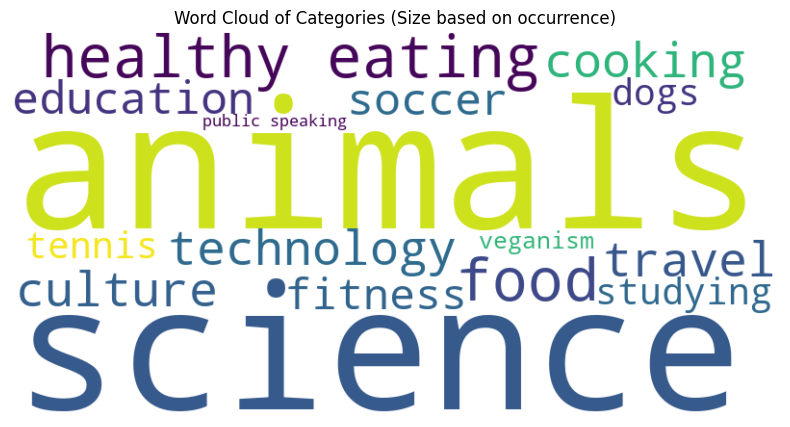

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Print total number of unique categories
total_unique_categories = content_data['Category'].nunique()
print(f"Total number of unique categories: {total_unique_categories}")

# Count the occurrences of each category
category_counts = content_data['Category'].value_counts()

# Generate a WordCloud based on category occurrences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counts)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories (Size based on occurrence)')
plt.show()

#### Top 5 Content Categories

In [16]:
top_five_categories = content_data['Category'].value_counts().nlargest(5).index

# Filter the DataFrame to include only rows where the Category is in the top five categories
filtered_data = content_data[content_data['Category'].isin(top_five_categories)]

# Display the new DataFrame
filtered_data

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
45,45,9f737e0a-3cdd-4d29-9d24-753f4e3be810,dislike,25/6/20 17:01,photo,healthy eating,negative,10
46,46,9f737e0a-3cdd-4d29-9d24-753f4e3be810,intrigued,13/9/20 0:11,photo,healthy eating,positive,45
47,47,9f737e0a-3cdd-4d29-9d24-753f4e3be810,peeking,20/8/20 18:17,photo,healthy eating,neutral,35
48,48,9f737e0a-3cdd-4d29-9d24-753f4e3be810,scared,11/2/21 4:53,photo,healthy eating,negative,15
49,49,9f737e0a-3cdd-4d29-9d24-753f4e3be810,hate,8/3/21 10:40,photo,healthy eating,negative,5
...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/6/20 9:46,audio,technology,negative,10
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/2/21 17:17,audio,technology,positive,45
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/9/20 3:54,audio,technology,positive,30
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,4/11/20 20:08,audio,technology,negative,12


In [17]:
filtered_data['Category'].unique()

array(['healthy eating', 'technology', 'food', 'science', 'animals'],
      dtype=object)

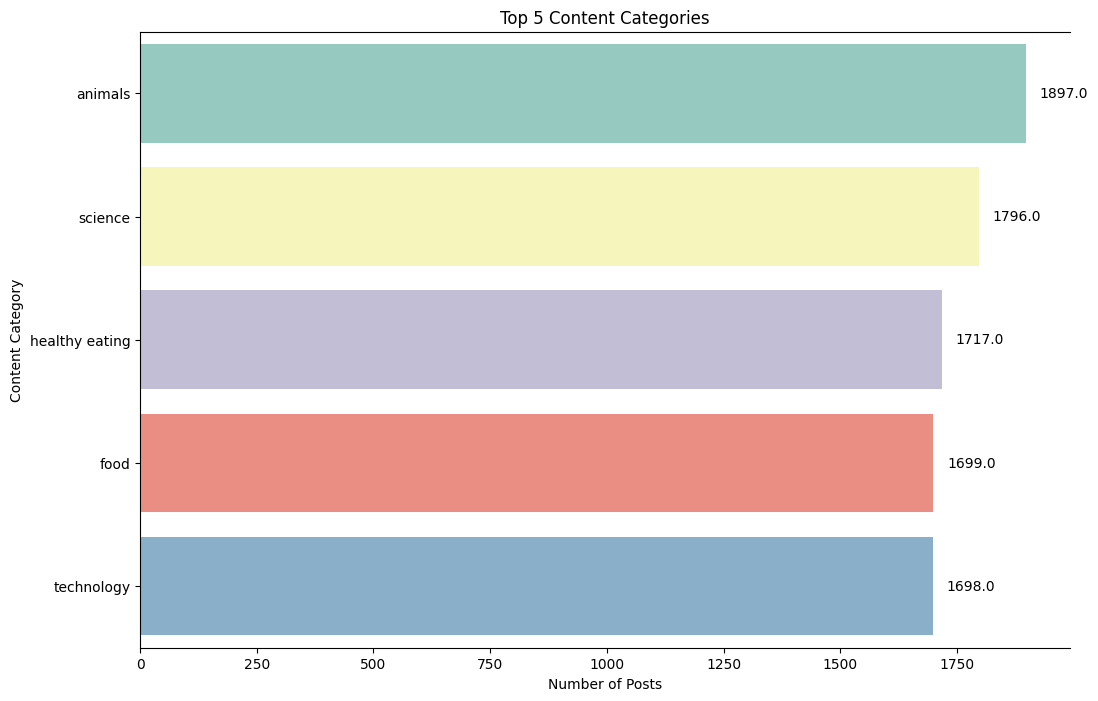

,Category,Count
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698


In [39]:
import seaborn as sns

# Top 5 Content Categories
top_categories = filtered_data['Category'].value_counts().nlargest(5)

# Set a color palette with 5 distinct colors
colors = sns.color_palette("Set3", n_colors=5)

# Create a wider horizontal bar plot with counts and different colors for each category
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette=colors, orient='h', dodge=False)

# Add count labels on the right side of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points')

ax.spines['right'].set_visible(False)  # Remove right border
ax.set(xlabel='Number of Posts', ylabel='Content Category', title='Top 5 Content Categories')

plt.show()

# Create a table
table_data = {'Category': top_categories.index, 'Count': top_categories.values}
table_df = pd.DataFrame(table_data)

table_df


#### Number of Unique Categories 

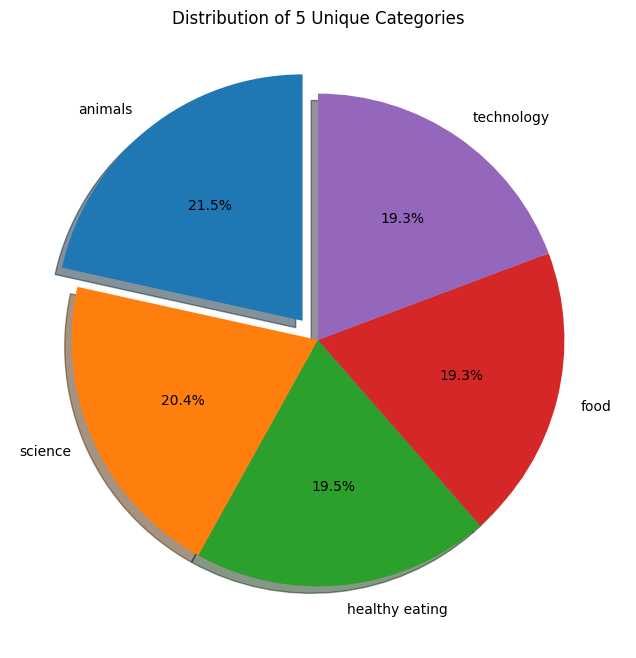

In [42]:
# Distribution of Unique Categories
unique_categories = filtered_data['Category'].nunique()
categories_distribution = filtered_data['Category'].value_counts()

# Highlight the highest percentage category
explode = [0.1 if cat == categories_distribution.idxmax() else 0 for cat in categories_distribution.index]

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
categories_distribution.plot(kind='pie', autopct='%1.1f%%', explode=explode,
                              startangle=90, shadow=True, title=f'Distribution of {unique_categories} Unique Categories')

# Remove the count on the y-axis
plt.ylabel('')

plt.show()


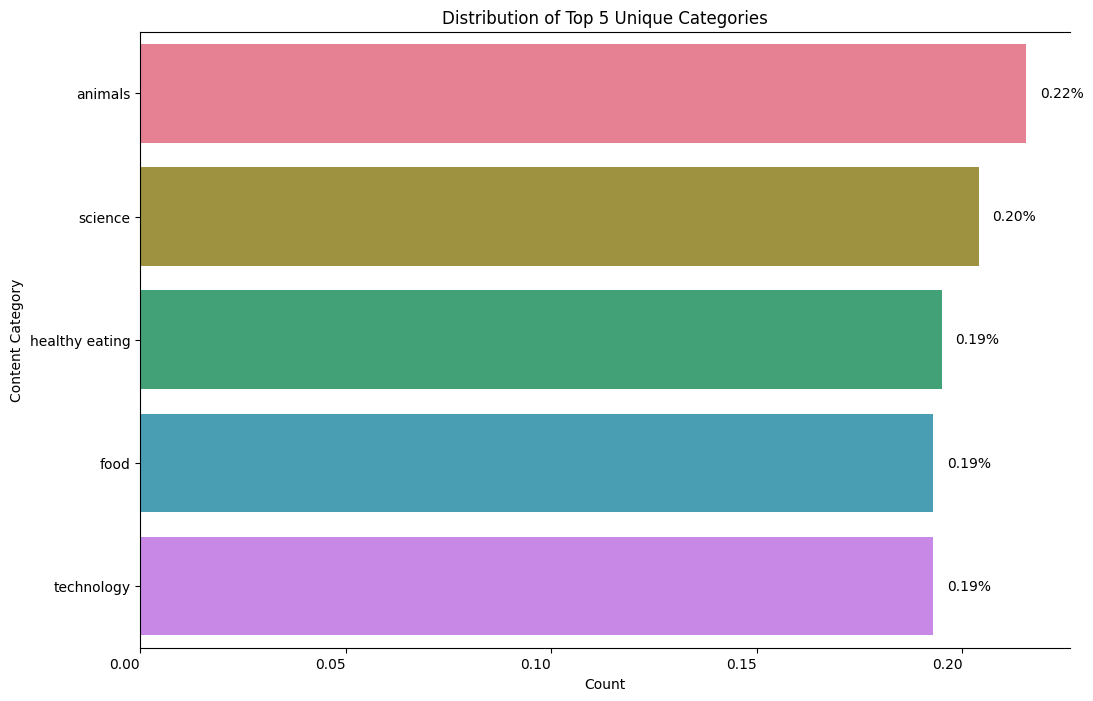

,Category,Percentage
0,animals,21.539684
1,science,20.392869
2,healthy eating,19.495856
3,food,19.291473
4,technology,19.280118


In [33]:
import seaborn as sns

# Distribution of Top 5 Unique Categories
category_distribution = filtered_data['Category'].value_counts(normalize=True)

# Set a color palette with 5 distinct colors
colors = sns.color_palette("husl", n_colors=5)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the distribution with horizontal bars and percentages displayed on top
sns.barplot(x=category_distribution.values, y=category_distribution.index, ax=ax, palette=colors, orient='h')

# Set spines' visibility to False to remove borders around the chart
ax.spines['right'].set_visible(False)

ax.set(xlabel='Count', ylabel='Content Category', title='Distribution of Top 5 Unique Categories')

# Customize x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Display percentages on the right side of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.),
                va='center', ha='left', xytext=(10, 0), textcoords='offset points')

# Show the plot without borders
plt.show()

# Create a DataFrame for categories and percentages
categories_df = pd.DataFrame({'Category': category_distribution.index, 'Percentage': category_distribution.values * 100})
categories_df = categories_df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

categories_df


#### Reaction to the most Popular category

In [42]:
# Top 5 Content Categories
top_categories = filtered_data['Category'].value_counts().nlargest(5)

# Find the most popular category from the top 5
most_popular_category = top_categories.idxmax()

# Filter the DataFrame for the most popular category
most_popular_category_df = filtered_data[filtered_data['Category'] == most_popular_category]

# Count the number of reactions for the most popular category
reactions_count = most_popular_category_df['Reaction Type'].value_counts()

print(f"The most popular category is '{most_popular_category}' with the following reactions:")
print(reactions_count)

The most popular category is 'animals' with the following reactions:
Reaction Type
scared         132
peeking        129
hate           128
cherish        125
super love     123
disgust        122
want           122
worried        121
heart          120
love           119
intrigued      116
dislike        115
adore          114
interested     110
like           101
indifferent    100
Name: count, dtype: int64


In [46]:
# Find the most popular category from the top 5
most_popular_category = top_categories.idxmax()

# Filter the DataFrame for the most popular category
most_popular_category_df = filtered_data[filtered_data['Category'] == most_popular_category]


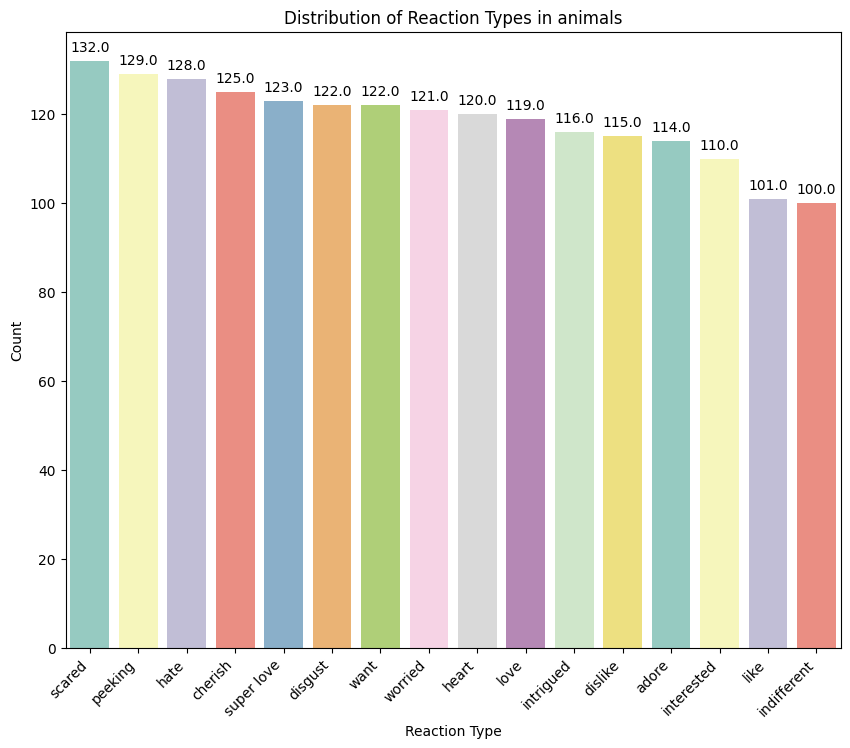

   Reaction Type  Count
0         scared    132
1        peeking    129
2           hate    128
3        cherish    125
4     super love    123
5        disgust    122
6           want    122
7        worried    121
8          heart    120
9           love    119
10     intrigued    116
11       dislike    115
12         adore    114
13    interested    110
14          like    101
15   indifferent    100


In [50]:
# Distribution of Reaction Types
reaction_distribution = most_popular_category_df['Reaction Type'].value_counts()

# Set a color palette with distinct colors for each reaction type
colors = sns.color_palette("Set3", n_colors=len(reaction_distribution))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting the distribution with different colors for each reaction type
sns.barplot(x=reaction_distribution.index, y=reaction_distribution.values, ax=ax, palette=colors)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.set(xlabel='Reaction Type', ylabel='Count', title=f"Distribution of Reaction Types in {most_popular_category}")

# Display counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Create a DataFrame for reaction types and counts
reactions_df = pd.DataFrame({'Reaction Type': reaction_distribution.index, 'Count': reaction_distribution.values})
reactions_df = reactions_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(reactions_df)

#### Month with the most Post

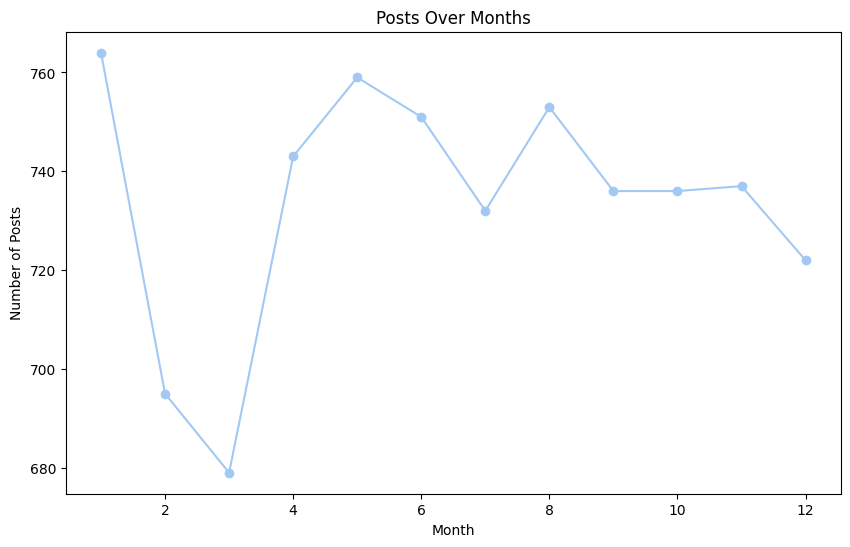

In [38]:
# Create a copy of the DataFrame
filtered_data_copy = filtered_data.copy()

# Convert 'Datetime' column to datetime format
filtered_data_copy['Datetime'] = pd.to_datetime(filtered_data_copy['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Create a new 'Month' column
filtered_data_copy['Month'] = filtered_data_copy['Datetime'].dt.month

# Count the number of posts per month and sort by month
posts_per_month = filtered_data_copy['Month'].value_counts().sort_index()

# Plot the posts over months
plt.figure(figsize=(10, 6))
posts_per_month.plot(kind='line', marker='o', xlabel='Month', ylabel='Number of Posts', title='Posts Over Months')
plt.show()

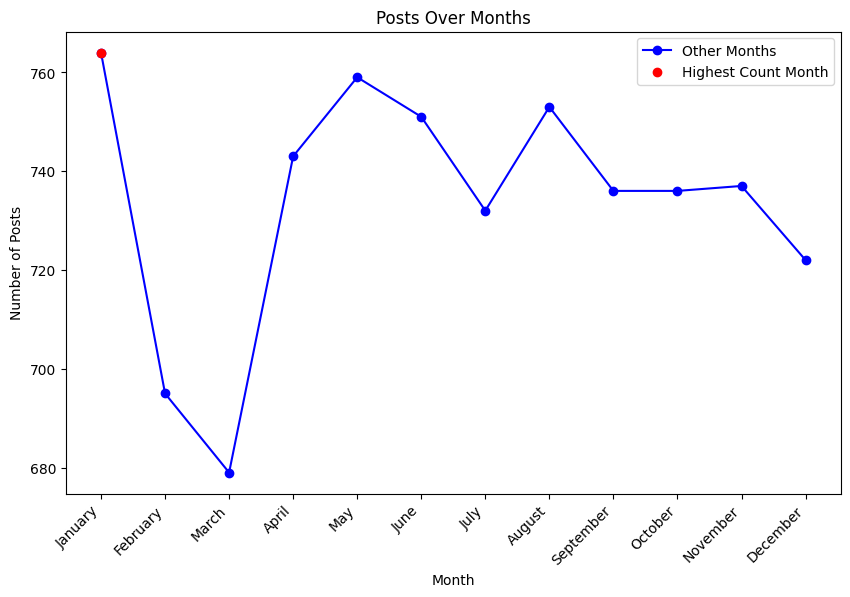

In [53]:
import calendar  # Import the calendar module
# Create a copy of the DataFrame
filtered_data_copy = filtered_data.copy()

# Convert 'Datetime' column to datetime format
filtered_data_copy['Datetime'] = pd.to_datetime(filtered_data_copy['Datetime'], format='%Y-%m-%d %H:%M:%S')

# Create a new 'Month' column
filtered_data_copy['Month'] = filtered_data_copy['Datetime'].dt.month

# Count the number of posts per month and sort by month
posts_per_month = filtered_data_copy['Month'].value_counts().sort_index()

# Convert month numbers to month names
month_names = [calendar.month_name[month] for month in posts_per_month.index]

# Find the month with the highest count
highest_count_month = posts_per_month.idxmax()

# Plot the posts over months with highest count highlighted
plt.figure(figsize=(10, 6))
plt.plot(posts_per_month.index, posts_per_month.values, marker='o', color='blue', label='Other Months')
plt.scatter(highest_count_month, posts_per_month[highest_count_month], color='red', label='Highest Count Month', zorder=5)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Posts Over Months')
plt.xticks(posts_per_month.index, month_names, rotation=45, ha='right')
plt.legend()
plt.show()

In [39]:
# Create a DataFrame for month and number of posts
posts_df = pd.DataFrame({'Month': posts_per_month.index, 'Number of Posts': posts_per_month.values})
print(posts_df)

    Month  Number of Posts
0       1              764
1       2              695
2       3              679
3       4              743
4       5              759
5       6              751
6       7              732
7       8              753
8       9              736
9      10              736
10     11              737
11     12              722
